# Assignment on explorative data analysis

Dear students,

this introductory course to machine learning has not started yet. However, an industry partner just provided us with a real data set and is now quite eager to hear whether machine learning applied to this data can open up new opportunities or improve their current business. We therefore ask you to conduct an explorative data analysis and to elaborate on how machine learning could bring our partner to a next level. We award points for non-trivial insights that emerge from your data analysis as well as for reasonable advises to our industry partner. Try your best even when you feel like being thrown in at the deep end.

## Schifffahrtsgesellschaft Vierwaldstättersee 

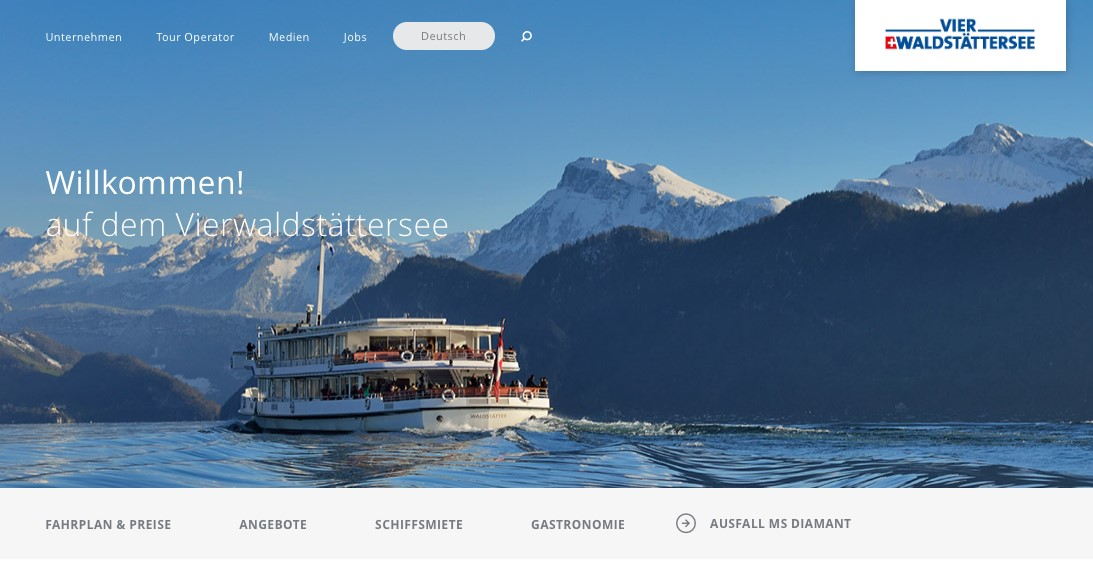

We are given a data set containing the number of passengers per day along with a lot more information. Conduct an explorative analysis, uncover interesting and non-trivial insights and speculate on how your insights would boost our partner’s business.

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Load the data
> Load the dataset `sgv.csv` as a pandas dataframe. *Hint: You have to use the argument `sep`*

In [2]:
df = pd.read_csv("sgv.csv", sep=";")

In [3]:
df = pd.read_csv("sgv.csv", sep=";")

> Verify that the data has 18 columns.

In [4]:
df.shape

(3652, 18)

In [5]:
df.shape

(3652, 18)

> Display the first 5 rows.

In [6]:
df.head()

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month,Day,Month
0,2580,0,4.9,52.0,5.0,2.3,5.1,-0.8,0.9,12.1,4.6,9.9,1,1,2006,1,Sunday,January
1,1973,0,2.4,0.0,5.0,2.3,3.4,0.6,2.7,12.4,0.3,6.1,1,1,2006,2,Monday,January
2,1044,0,2.2,11.0,5.0,1.6,2.9,-1.6,1.8,12.4,0.0,5.3,0,0,2006,3,Tuesday,January
3,980,0,0.8,0.0,0.0,0.2,1.1,-1.0,0.6,10.3,0.0,6.4,0,0,2006,4,Wednesday,January
4,1139,0,-0.3,88.0,0.0,-1.8,0.9,-5.4,-3.2,0.3,0.0,4.5,0,0,2006,5,Thursday,January


In [7]:
df.head(n=5)

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month,Day,Month
0,2580,0,4.9,52.0,5.0,2.3,5.1,-0.8,0.9,12.1,4.6,9.9,1,1,2006,1,Sunday,January
1,1973,0,2.4,0.0,5.0,2.3,3.4,0.6,2.7,12.4,0.3,6.1,1,1,2006,2,Monday,January
2,1044,0,2.2,11.0,5.0,1.6,2.9,-1.6,1.8,12.4,0.0,5.3,0,0,2006,3,Tuesday,January
3,980,0,0.8,0.0,0.0,0.2,1.1,-1.0,0.6,10.3,0.0,6.4,0,0,2006,4,Wednesday,January
4,1139,0,-0.3,88.0,0.0,-1.8,0.9,-5.4,-3.2,0.3,0.0,4.5,0,0,2006,5,Thursday,January


It looks like the date is defined in 3 separate columns. Let's merge them together

In [8]:
df['Date'] = df['Month'].astype(str) + '-' + df['Day_in_Month'].astype(str) + '-' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month,Day,Month,Date
0,2580,0,4.9,52.0,5.0,2.3,5.1,-0.8,0.9,12.1,4.6,9.9,1,1,2006,1,Sunday,January,2006-01-01
1,1973,0,2.4,0.0,5.0,2.3,3.4,0.6,2.7,12.4,0.3,6.1,1,1,2006,2,Monday,January,2006-01-02
2,1044,0,2.2,11.0,5.0,1.6,2.9,-1.6,1.8,12.4,0.0,5.3,0,0,2006,3,Tuesday,January,2006-01-03
3,980,0,0.8,0.0,0.0,0.2,1.1,-1.0,0.6,10.3,0.0,6.4,0,0,2006,4,Wednesday,January,2006-01-04
4,1139,0,-0.3,88.0,0.0,-1.8,0.9,-5.4,-3.2,0.3,0.0,4.5,0,0,2006,5,Thursday,January,2006-01-05


### Handle datatypes

It's always a good idea to take a look at the data types. 

>Print the datatype of each column.

In [9]:
df.dtypes

Passengers                        int64
Revision                          int64
Temperature_Midday              float64
Sunshine_Percentage             float64
Snow_5Days                      float64
Temperature_Deviation           float64
Temperature_Max                 float64
Temperature_Min                 float64
Temperature_Evening             float64
Precipiation_5Days              float64
Precipiation                    float64
Wind                            float64
Holiday                           int64
Special_Event                     int64
Year                              int64
Day_in_Month                      int64
Day                              object
Month                            object
Date                     datetime64[ns]
dtype: object

In [10]:
df.dtypes

Passengers                        int64
Revision                          int64
Temperature_Midday              float64
Sunshine_Percentage             float64
Snow_5Days                      float64
Temperature_Deviation           float64
Temperature_Max                 float64
Temperature_Min                 float64
Temperature_Evening             float64
Precipiation_5Days              float64
Precipiation                    float64
Wind                            float64
Holiday                           int64
Special_Event                     int64
Year                              int64
Day_in_Month                      int64
Day                              object
Month                            object
Date                     datetime64[ns]
dtype: object

The columns *Month* and *Day* are categorical and nominal. 

> Encode them as pandas datatype `categorical` (you can use [pd.DataFrame.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)) and print the dtypes afterwards.

In [42]:
df.Month = df.Month.astype("category")
df.Day = df.Day.astype("category")
df.dtypes

Passengers                        int64
Revision                          int64
Temperature_Midday              float64
Sunshine_Percentage             float64
Snow_5Days                      float64
Temperature_Deviation           float64
Temperature_Max                 float64
Temperature_Min                 float64
Temperature_Evening             float64
Precipiation_5Days              float64
Precipiation                    float64
Wind                            float64
Holiday                           int64
Special_Event                     int64
Year                              int64
Day_in_Month                      int64
Day                            category
Month                          category
Date                     datetime64[ns]
dtype: object

In [12]:
df.Month = df.Month.astype('category')
df.Day = df.Day.astype('category')
df.dtypes

Passengers                        int64
Revision                          int64
Temperature_Midday              float64
Sunshine_Percentage             float64
Snow_5Days                      float64
Temperature_Deviation           float64
Temperature_Max                 float64
Temperature_Min                 float64
Temperature_Evening             float64
Precipiation_5Days              float64
Precipiation                    float64
Wind                            float64
Holiday                           int64
Special_Event                     int64
Year                              int64
Day_in_Month                      int64
Day                            category
Month                          category
Date                     datetime64[ns]
dtype: object

### Check for duplicates
Let's begin by checking for duplicate rows. With the data at hand, exact duplicates should not occur. Exact duplicates thus hint at an anomaly from entering, processing or extracting the data (which is in fact very common).

> Find out if there are rows that are exact duplicates. If there are, examine and possibly drop them. You can use [pd.DataFrame.duplicated()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html) and [pd.DataFrame.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html).

In [51]:
df.duplicated().any()

False

In [14]:
# if there are, print them...

In [15]:
# df.drop_duplicates()

In [16]:
# check if they are any
df.duplicated().any()

False

There are no duplicates in our dataset. If there would be any, we could display and drop them with the following commands:

In [17]:
# if there would be duplicates, we could display them with the following command:
df[df.duplicated(keep=False)].head(n=10)

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month,Day,Month,Date


In [18]:
# The duplicates could be dropped by using the following command:
df.drop_duplicates(inplace=True)

### Null Values
> Check if there are any null values in this dataset and replace them with the mean.

In [60]:
df.isna().any().any()

False

In [62]:
df.isna().any()

Passengers               False
Revision                 False
Temperature_Midday       False
Sunshine_Percentage      False
Snow_5Days               False
Temperature_Deviation    False
Temperature_Max          False
Temperature_Min          False
Temperature_Evening      False
Precipiation_5Days       False
Precipiation             False
Wind                     False
Holiday                  False
Special_Event            False
Year                     False
Day_in_Month             False
Day                      False
Month                    False
Date                     False
dtype: bool

In [21]:
df.isna().any() # add another .any() to aggregate to a single Boolean

Passengers               False
Revision                 False
Temperature_Midday       False
Sunshine_Percentage      False
Snow_5Days                True
Temperature_Deviation    False
Temperature_Max          False
Temperature_Min          False
Temperature_Evening      False
Precipiation_5Days       False
Precipiation              True
Wind                      True
Holiday                  False
Special_Event            False
Year                     False
Day_in_Month             False
Day                      False
Month                    False
Date                     False
dtype: bool

* It appears that the columns 'wind' and 'snow' have some null values. We replace them with the mean.

In [63]:
df = df.fillna(df.mean())

/Users/stofers/Development/HSLU/ADML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


### Data ranges

> Check the data ranges by examing the minimum and maximum value of each column. Comment your findings and fix the errors.
You can use the [pd.DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) method.

In [64]:
df.describe()

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,6387.780942,0.009584,12.849425,37.031613,0.718590,1.153313,14.617716,6.212568,11.556039,16.773439,3.347513,8.016350,0.042442,0.041073,2010.499726,15.727820
std,6033.510924,0.097440,8.509759,34.981708,3.097725,3.352714,8.801185,6.729164,8.341950,19.071723,7.159809,4.647082,0.221064,0.198487,2.872293,8.800529
min,0.000000,0.000000,-11.200000,0.000000,0.000000,-12.000000,-9.300000,-16.100000,-10.700000,0.000000,0.000000,2.200000,0.000000,0.000000,2006.000000,1.000000
25%,1547.000000,0.000000,6.000000,1.750000,0.000000,-1.100000,7.500000,0.600000,4.600000,1.700000,0.000000,4.900000,0.000000,0.000000,2008.000000,8.000000
50%,4029.000000,0.000000,13.300000,28.000000,0.000000,1.300000,15.100000,6.400000,11.900000,10.500000,0.000000,6.400000,0.000000,0.000000,2010.500000,16.000000
75%,9771.000000,0.000000,19.500000,68.000000,0.000000,3.500000,21.500000,11.800000,18.100000,24.900000,3.125000,9.725000,0.000000,0.000000,2013.000000,23.000000
max,34878.000000,1.000000,32.700000,100.000000,36.000000,14.600000,34.900000,21.500000,32.700000,113.700000,70.200000,31.100000,6.000000,1.000000,2015.000000,31.000000


In [24]:
# fix the errors

In [25]:
df.describe()

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,6387.802300,0.009584,12.849425,37.032161,0.788468,1.153313,14.617716,6.212568,11.556039,16.773439,3.347513,8.016350,0.042442,0.041073,2010.499726,15.727820
std,6033.488385,0.097440,8.509759,34.982702,3.107446,3.352714,8.801185,6.729164,8.341950,19.071723,7.159809,4.647082,0.221064,0.198487,2.872293,8.800529
min,0.000000,0.000000,-11.200000,0.000000,0.000000,-12.000000,-9.300000,-16.100000,-10.700000,0.000000,0.000000,2.200000,0.000000,0.000000,2006.000000,1.000000
25%,1547.000000,0.000000,6.000000,1.750000,0.000000,-1.100000,7.500000,0.600000,4.600000,1.700000,0.000000,4.900000,0.000000,0.000000,2008.000000,8.000000
50%,4029.000000,0.000000,13.300000,28.000000,0.000000,1.300000,15.100000,6.400000,11.900000,10.500000,0.000000,6.400000,0.000000,0.000000,2010.500000,16.000000
75%,9771.000000,0.000000,19.500000,68.000000,0.000000,3.500000,21.500000,11.800000,18.100000,24.900000,3.125000,9.725000,0.000000,0.000000,2013.000000,23.000000
max,34878.000000,1.000000,32.700000,101.000000,36.000000,14.600000,34.900000,21.500000,32.700000,113.700000,70.200000,31.100000,6.000000,1.000000,2015.000000,31.000000


It appears that the maximum value of sunshine is **101%**. You can easily fix this by using the following command:

In [26]:
df["Sunshine_Percentage"].values[df["Sunshine_Percentage"] > 100] = 100

### Plot the data
To get a better understanding we often plot the data.

> Plot the number of passengers over time and try to interpret the data.

<AxesSubplot:>

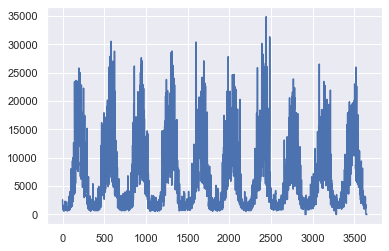

In [67]:
df.Passengers.plot()

<AxesSubplot:title={'center':'Passengers over time'}>

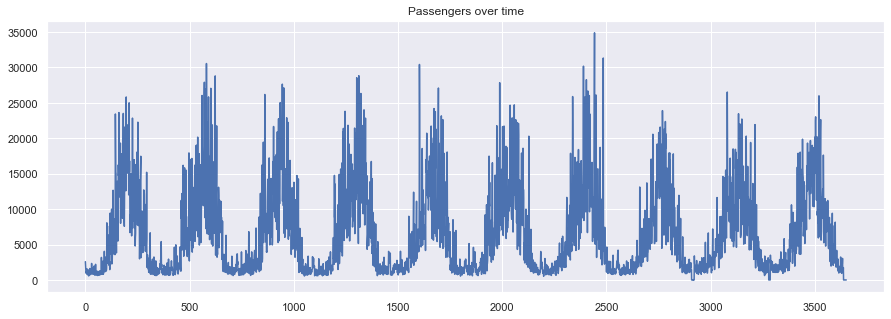

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
df.Passengers.plot(title="Passengers over time", ax=ax)

Here we see some periodic patterns which may be related to seasonal effects (winter and summer). At this stage, we perform a data analysis for a better understanding of the effects and identify possible outliers.

### Correlation analysis
> Implement a correlation analysis for the given dataset. Comment your findings.

<AxesSubplot:>

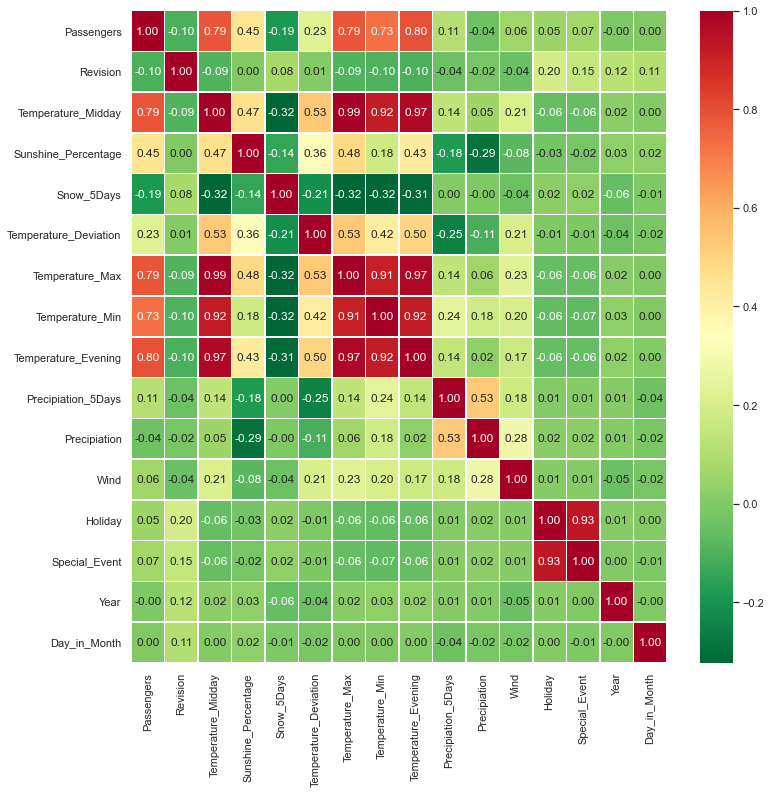

In [69]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5, fmt='.2f')

<AxesSubplot:>

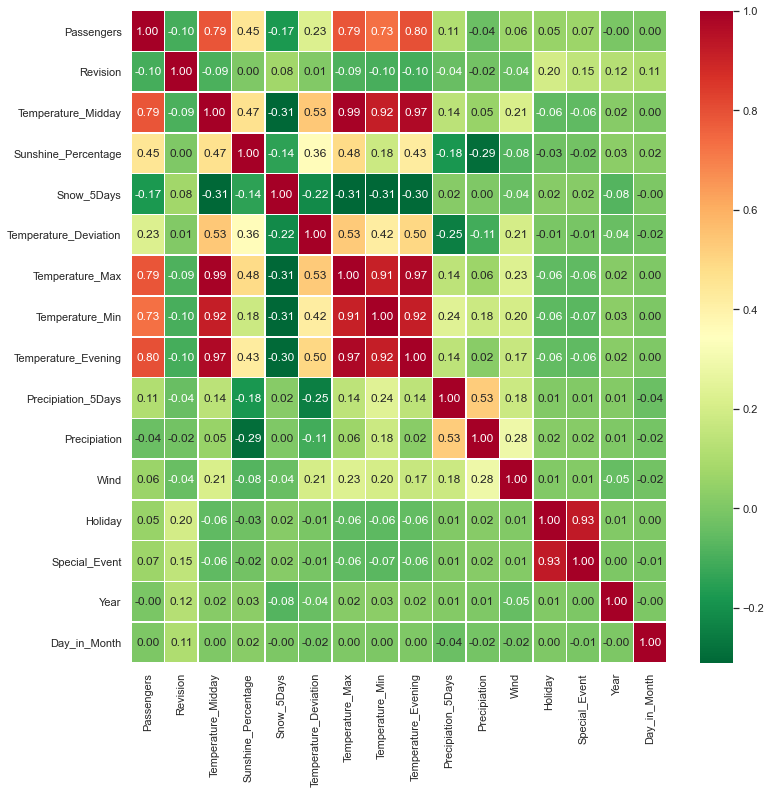

In [30]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5, fmt='.2f')

In the correlation matrix above we can see some correlation
* The temperature correlates highly with the number of passengers
* The percentage of sunshine correlates with the number of passengers

### Outliers
Let's take a look at outliers. A boxplot is a very useful graphical representation of a five number summary together with potential outliers. Outliers are displayed as small circles above or below the boxplot.

We create a boxplot for every numerical value.

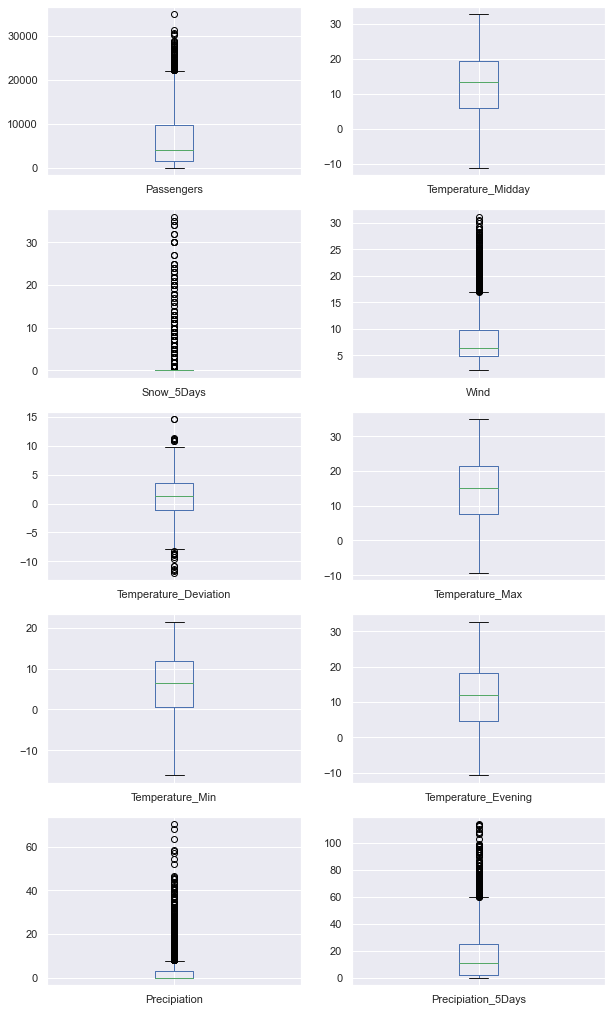

In [31]:
numerical_cols = ['Passengers', 'Temperature_Midday', 'Snow_5Days', 'Wind', 'Temperature_Deviation',
                  'Temperature_Max', 'Temperature_Min', 'Temperature_Evening', 'Precipiation', 'Precipiation_5Days']
_ = df.loc[:, numerical_cols].plot(kind='box', subplots=True, layout=(5, 2), figsize=(10, 18), sharex=False)

According to the rule that values at least $1.5 \cdot \text{IQR}$ above the 3rd quartile or below the 1st quartile are considered as outliers, we have many of those (the circles in the boxplot). However, as we already have checked the validity of the data ranges, we assume that these are in fact valid, but extreme samples.

## Sanity check
It often makes sense to manually check the dataset for logical issues. In our case we could check if there were any passengers when there was a revision or if there was snow at unexpected times.

### Amount of passengers during revisions
During revisions no ships are in use. Therefore, the amount of passengers during this period is expected to be zero. 
> Check if this is the case and fix the error.

In [76]:
df[(df.Revision == 1) & (df.Passengers > 0)].head()

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month,Day,Month,Date


In [33]:
df[(df.Revision == 1) & (df.Passengers > 0)].head()

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month,Day,Month,Date
2915,24,1,8.3,0.0,0.0,5.9,17.0,4.8,5.5,5.6,3.5,24.9,1,1,2013,25,Wednesday,December,2013-12-25
2917,54,1,4.4,96.0,0.0,0.5,5.5,-1.3,1.2,25.4,0.0,4.7,0,0,2013,27,Friday,December,2013-12-27


In [77]:
df.Passengers.values[df.Revision==1] = 0

In [35]:
df.Passengers.values[df.Revision==1] = 0

### Compare min/max temperature

For each day, there is a minumum and maximum temperature recorded. 
> Check if the minimum temperature is smaller than the maximum temperature.

In [79]:
df[df.Temperature_Max < df.Temperature_Min]

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month,Day,Month,Date


In [37]:
(df["Temperature_Min"] < df["Temperature_Max"]).all()

True

### Take a closer look to the snow distribution over the months

Lets convert our dataset into a matrix where we can see the average amount of snow for each month per year.

In [80]:
pd.pivot_table(df, index=[df.Date.dt.month, "Month"], columns=["Year"], values=["Snow_5Days"])

Snow_5Days                                                    \
Year                 2006      2007      2008      2009      2010      2011   
Date Month                                                                    
1    January     1.451613  2.258065  0.788468  1.960918  6.354839  1.774194   
2    February    1.285714  0.000000  0.788468  6.250000  4.928571  0.000000   
3    March       6.741935  1.960918  0.788468  0.000000  0.806452  0.000000   
4    April       0.333333  0.788468  0.788468  0.000000  0.000000  0.000000   
5    May         0.000000  0.788468  0.788468  0.000000  0.000000  0.000000   
6    June        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7    July        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8    August      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9    September   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10   October     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11   November    0.000000  0.788468  1.633333  0.266667  0.433333  0.026282   
12   December    0.000000  0.788468  5.161290  3.129032  6.516129  1.230770   

                                                        
Year                2012      2013      2014      2015  
Date Month                                              
1    January    0.451613  1.290323  0.000000  3.354839  
2    February   1.241379  5.714286  0.000000  0.000000  
3    March      0.000000  1.290323  0.000000  0.000000  
4    April      0.000000  0.333333  0.000000  0.000000  
5    May        0.000000  0.000000  0.000000  0.000000  
6    June       0.000000  0.000000  0.000000  0.000000  
7    July       0.000000  0.000000  0.000000  0.000000  
8    August     0.000000  0.000000  0.000000  0.000000  
9    September  0.000000  0.000000  0.000000  0.000000  
10   October    0.000000  0.000000  0.000000  0.000000  
11   November   0.152565  0.000000  0.000000  0.000000  
12   December   7.714641  0.000000  3.580645  0.000000

Take a look at the table above. Comment your findings and try to explain how these anomalies could have occured.

> Findings: Gleiche Durchschnittswerte (0.788468) von april/May und Nov 2007 bis May 2008, evtl. Messfehler

* There was snow during the summer in 2007 and 2008
* The amount of snow remained constant from april 2007 till september 2008

Now we want to clean these errors. 
> Set the amount of snow for months june, july, august, september and october to zero.

In [85]:
df.Snow_5Days.values[((df.Year==2007) & (df.Year == 2008))&(df.Month.isin(["June", "July", "August", "September","October"]))] = 0

In [40]:
df.Snow_5Days.values[df.Month.isin(["June", "July", "August", "September", "October"])] = 0

## Automatic Data Quality Assessment
[Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) is pretty neat python package which allows us to automatically generate a profile report for a data frame. Let's try it out on our dataset and check whether it recognizes that there were some missing snow records.

*Note*: You might run into issues with some browsers. We recommend you to use the Chrome Browser. Alterantively you can save the report as html.

In [114]:
import pandas_profiling
df2 = pd.read_csv("sgv.csv", sep=";")
profile = df2.profile_report(style={"full_width":True})
# profile = df2.profile_report(html={'style':{'full_width':True}})
# Save report
#profile.to_file(output_file="sgv-profile.html")
profile

ValueError: Config parameter "style" does not exist.

## Assignment
Now it's your turn. Open the ILIAS quiz **Data Quality Assessment** and answer the questions.

> Use these cells to answer the questions

In [104]:
df.Passengers[(df.Year==2006)&(df.Month=="January")].sum()

35108

In [105]:
df.Passengers[(df.Year==2006)]

0      2580
1      1973
2      1044
3       980
4      1139
       ... 
360    1648
361    2830
362    2377
363    2586
364    5416
Name: Passengers, Length: 365, dtype: int64

In [106]:
df.corr()

,Passengers,Revision,Temperature_Midday,Sunshine_Percentage,Snow_5Days,Temperature_Deviation,Temperature_Max,Temperature_Min,Temperature_Evening,Precipiation_5Days,Precipiation,Wind,Holiday,Special_Event,Year,Day_in_Month
Passengers,1.000000,-0.104160,0.786485,0.447230,-0.187769,0.225903,0.787551,0.728609,0.795874,0.113195,-0.036167,0.061777,0.052626,0.065916,-0.004108,0.000257
Revision,-0.104160,1.000000,-0.092400,0.001197,0.077901,0.007239,-0.090615,-0.100730,-0.104277,-0.040675,-0.020911,-0.044865,0.197275,0.149583,0.120871,0.107808
Temperature_Midday,0.786485,-0.092400,1.000000,0.466809,-0.322281,0.533886,0.991408,0.917988,0.970935,0.138825,0.054137,0.213556,-0.055598,-0.055639,0.018571,0.004227
Sunshine_Percentage,0.447230,0.001197,0.466809,1.000000,-0.143008,0.356805,0.484111,0.176774,0.425979,-0.181292,-0.291001,-0.078732,-0.025781,-0.021410,0.026899,0.024667
Snow_5Days,-0.187769,0.077901,-0.322281,-0.143008,1.000000,-0.210942,-0.319360,-0.323187,-0.314458,0.002710,-0.004697,-0.041271,0.020784,0.024749,-0.055270,-0.007769
Temperature_Deviation,0.225903,0.007239,0.533886,0.356805,-0.210942,1.000000,0.531547,0.417009,0.497420,-0.247726,-0.108423,0.205983,-0.005160,-0.009548,-0.043551,-0.015763
Temperature_Max,0.787551,-0.090615,0.991408,0.484111,-0.319360,0.531547,1.000000,0.908222,0.974889,0.139500,0.063609,0.231395,-0.056331,-0.055747,0.017851,0.001305
Temperature_Min,0.728609,-0.100730,0.917988,0.176774,-0.323187,0.417009,0.908222,1.000000,0.917940,0.241029,0.179533,0.202117,-0.064452,-0.067156,0.028021,0.000224
Temperature_Evening,0.795874,-0.104277,0.970935,0.425979,-0.314458,0.497420,0.974889,0.917940,1.000000,0.142209,0.023961,0.169129,-0.055161,-0.055847,0.024374,0.002863
Precipiation_5Days,0.113195,-0.040675,0.138825,-0.181292,0.002710,-0.247726,0.139500,0.241029,0.142209,1.000000,0.527242,0.176586,0.006751,0.010259,0.012344,-0.036434


In [111]:
from scipy.spatial import distance
m = (70, 13, 394)
b = (22, 18, 286)
a = (183, 1, 350)
dst = distance.euclidean(m, a)
dst

121.85647295076286

In [113]:
import numpy as np
A=np.array([3, 14, 18, 23])
B=np.array([12, 16, 21, 29])
cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
cos_sim

0.9782608695652174